In [28]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from os import listdir

## Locomotion Task

In [11]:
data = pd.read_csv('loco_6legs.csv', skiprows=3)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'loco_6legs.csv'

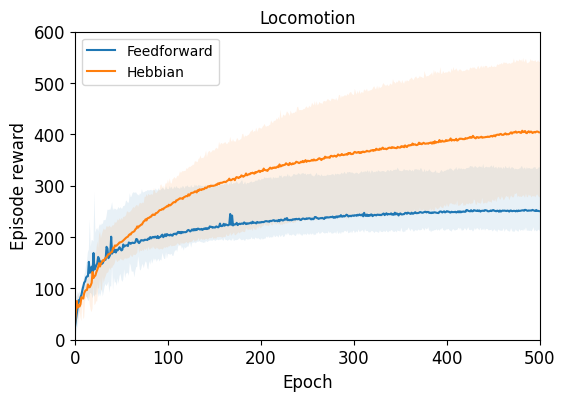

In [56]:
# Locomotion Training data
plt.figure(figsize=(6,4))

plt.plot(data['mean'])
plt.plot(data['mean.1'])

plt.fill_between(data['epoch'], data['min'], data['max'], alpha=0.1)
plt.fill_between(data['epoch'], data['min.1'], data['max.1'], alpha=0.1)

plt.title('Locomotion')
plt.ylabel('Episode reward', fontsize='large')
plt.xlabel('Epoch', fontsize='large')
plt.xlim([0, 500])
plt.ylim([0, 600])
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')

plt.legend(['Feedforward', 'Hebbian'], loc='upper left')
# plt.show()
# plt.savefig('locomotion_train.pdf', bbox_inches='tight')

In [18]:
a = "ab"
a.split('.')[0]

'ab'

In [27]:
dir_path = 'rewards/object_group/'
file_list = listdir(dir_path)
# print(sorted(file_list))
for name in file_list:
    rew_index = name.rfind('_')
    reward_name = name[rew_index+1:rew_index+4]
    reward = reward_name.split('.')[0]
    print(name.split('_'))

['rewards', 'Hebb', 'small', 'smallbox', 'trans', '230.csv']
['rewards', 'FF', 'normal', 'normalbox', 'trans', '168.csv']
['rewards', 'FF', 'normal', 'smallbox', 'trans', '168.csv']
['rewards', 'Hebb', 'small', 'normalbox', 'trans', '230.csv']
['rewards', 'Hebb', 'normal', 'normalbox', 'trans', '278.csv']
['rewards', 'Hebb', 'normal', 'normalbox', 'trans', '231.csv']
['rewards', 'FF', 'normal', 'smallbox', 'trans', '212.csv']
['rewards', 'Hebb', 'normal', 'normalbox', 'trans', '191.csv']
['rewards', 'Hebb', 'small', 'smallbox', 'trans', '247.csv']
['rewards', 'FF', 'normal', 'normalbox', 'trans', '212.csv']
['rewards', 'FF', 'normal', 'normalbox', 'trans', '121.csv']
['rewards', 'Hebb', 'small', 'smallbox', 'trans', '238.csv']
['rewards', 'FF', 'small', 'normalbox', 'trans', '208.csv']
['rewards', 'Hebb', 'normal', 'smallbox', 'trans', '278.csv']
['rewards', 'Hebb', 'normal', 'normalbox', 'trans', '275.csv']
['rewards', 'FF', 'normal', 'smallbox', 'trans', '64..csv']
['rewards', 'FF', 

In [103]:
temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward'])
temp['reward'] = read_data.values.flatten()
temp['series'] = 2
temp['robot_num'] = np.arange(1,len(read_data.values)+1)
temp['model'] = 'FF'
temp['train_env'] = 'normal'
temp['test_env'] = 'tiltL'
temp

,series,robot_num,model,train_env,test_env,reward
0,2,1,FF,normal,tiltL,258.098114
1,2,2,FF,normal,tiltL,266.206116
2,2,3,FF,normal,tiltL,274.611725
3,2,4,FF,normal,tiltL,281.055176
4,2,5,FF,normal,tiltL,257.692719
...,...,...,...,...,...,...
1018,2,1019,FF,normal,tiltL,265.828491
1019,2,1020,FF,normal,tiltL,270.303497
1020,2,1021,FF,normal,tiltL,256.655121
1021,2,1022,FF,normal,tiltL,259.127563


In [53]:
model_list = ['Feedforward', 'Hebb']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/object_group/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[3]
    reward = int(name.split('_')[5].split('.')[0])
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,normal,normalbox,25.442247,121
1,1,2,FF,normal,normalbox,14.981482,121
2,1,3,FF,normal,normalbox,5.134417,121
3,1,4,FF,normal,normalbox,19.727005,121
4,1,5,FF,normal,normalbox,103.971153,121
...,...,...,...,...,...,...,...
1018,38,1019,Hebb,small,smallbox,263.863068,304
1019,38,1020,Hebb,small,smallbox,255.076218,304
1020,38,1021,Hebb,small,smallbox,225.348801,304
1021,38,1022,Hebb,small,smallbox,259.236328,304


In [105]:
df['test_env'].unique()

array(['normalbox_trans', 'smallbox_trans', 'box_trans_tiltL',
       'box_trans_tiltR'], dtype=object)

<AxesSubplot: xlabel='train_env', ylabel='reward'>

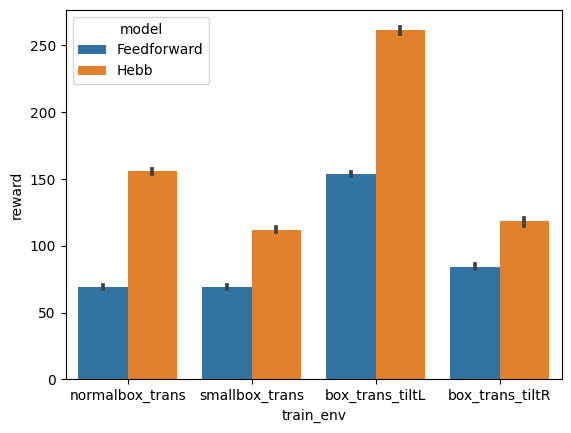

In [106]:
sns.barplot(x="train_env", y="reward", hue="model", data=df)

In [173]:
test_data.reset_index()
test_data

,index,series,robot_num,model,train_env,test_env,reward
0,0,1,1,Feedforward,normalbox_trans,normalbox_trans,161.374268
1,1,1,2,Feedforward,normalbox_trans,normalbox_trans,151.257660
2,2,1,3,Feedforward,normalbox_trans,normalbox_trans,151.890305
3,3,1,4,Feedforward,normalbox_trans,normalbox_trans,130.310486
4,4,1,5,Feedforward,normalbox_trans,normalbox_trans,140.116684
...,...,...,...,...,...,...,...
8179,1018,20,1019,Hebb,normalbox_trans,box_trans_tiltR,107.273682
8180,1019,20,1020,Hebb,normalbox_trans,box_trans_tiltR,112.136169
8181,1020,20,1021,Hebb,normalbox_trans,box_trans_tiltR,128.348160
8182,1021,20,1022,Hebb,normalbox_trans,box_trans_tiltR,145.223633


(0.0, 350.0)

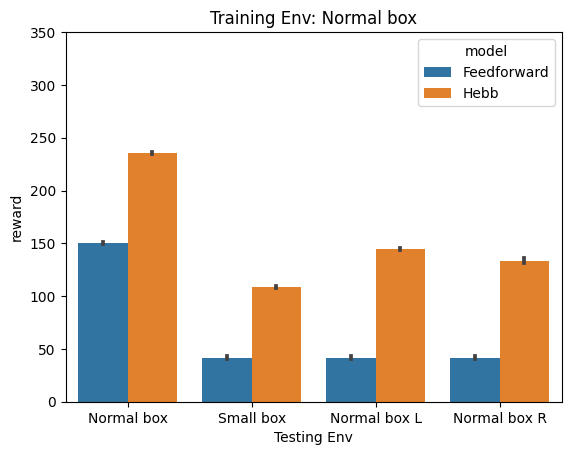

In [163]:
test_data = df.loc[df['train_env'] == 'normalbox_trans']
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Normal box')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')
plt.ylim([0,350])

(0.0, 350.0)

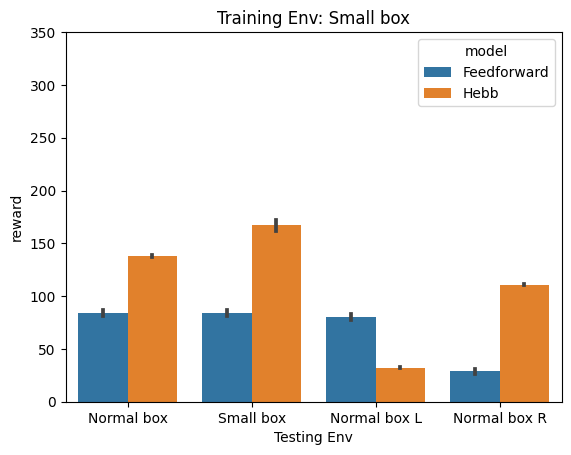

In [98]:
test_data = df.loc[df['train_env'] == 'smallbox_trans']
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Small box')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')
plt.ylim([0,350])

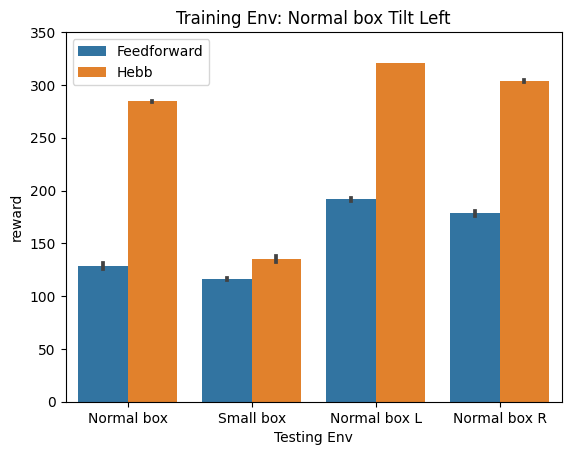

In [101]:
test_data = df.loc[df['train_env'] == 'box_trans_tiltL']
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Normal box Tilt Left')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')
plt.ylim([0,350])
plt.legend(loc='upper left')

(0.0, 350.0)

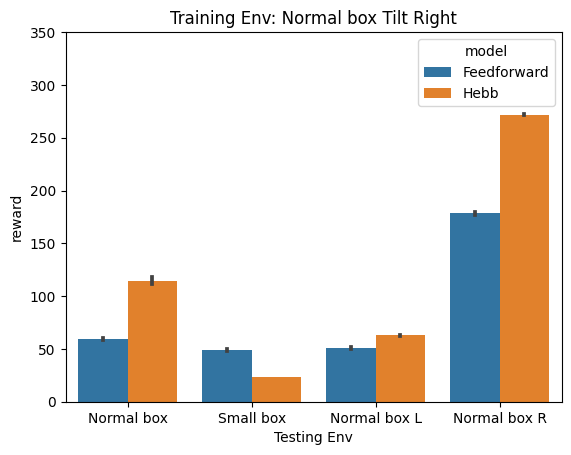

In [100]:
test_data = df.loc[df['train_env'] == 'box_trans_tiltR']
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Normal box Tilt Right')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')
plt.ylim([0,350])

### Reward Proportion test

/tmp/ipykernel_2897031/501158594.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mask = mask.groupby('model').mean()


Text(0.5, 0, 'Testing Env')

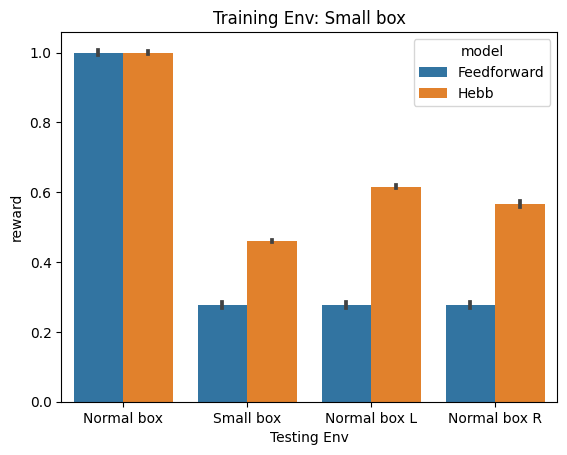

In [182]:
test_data = df.loc[df['train_env'] == 'normalbox_trans']
mask = test_data.loc[test_data['test_env'] == 'normalbox_trans']
mask = mask.groupby('model').mean()
FF_mean = mask.iloc[0].values[0]
Hebb_mean = mask.iloc[1].values[0]

test_data = test_data.reset_index()

for i in range(test_data.values.shape[0]):
    if test_data.iloc[i]['model'] == 'Feedforward':
        test_data.loc[i, 'reward'] = test_data.iloc[i]['reward']/FF_mean
    elif test_data.iloc[i]['model'] == 'Hebb':
        test_data.loc[i, 'reward'] = test_data.iloc[i]['reward']/Hebb_mean
test_data
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Small box')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')

/tmp/ipykernel_2897031/753434562.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mask = mask.groupby('model').mean()


Text(0.5, 0, 'Testing Env')

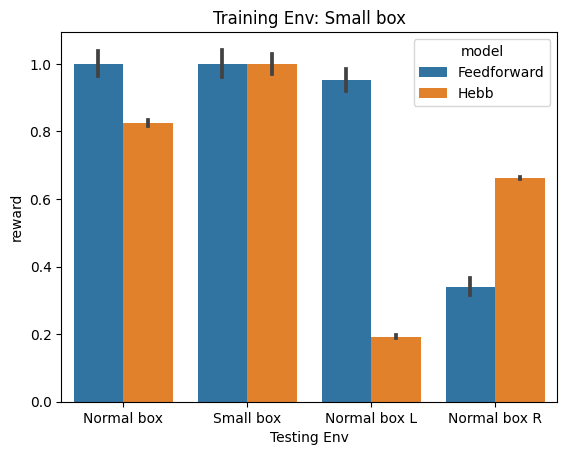

In [179]:
test_data = df.loc[df['train_env'] == 'smallbox_trans']
mask = test_data.loc[test_data['test_env'] == 'smallbox_trans']
mask = mask.groupby('model').mean()
FF_mean = mask.iloc[0].values[0]
Hebb_mean = mask.iloc[1].values[0]

test_data = test_data.reset_index()

for i in range(test_data.values.shape[0]):
    if test_data.iloc[i]['model'] == 'Feedforward':
        test_data.loc[i, 'reward'] = test_data.iloc[i]['reward']/FF_mean
    elif test_data.iloc[i]['model'] == 'Hebb':
        test_data.loc[i, 'reward'] = test_data.iloc[i]['reward']/Hebb_mean
test_data
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Small box')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')

/tmp/ipykernel_2897031/3880404941.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mask = mask.groupby('model').mean()


Text(0.5, 0, 'Testing Env')

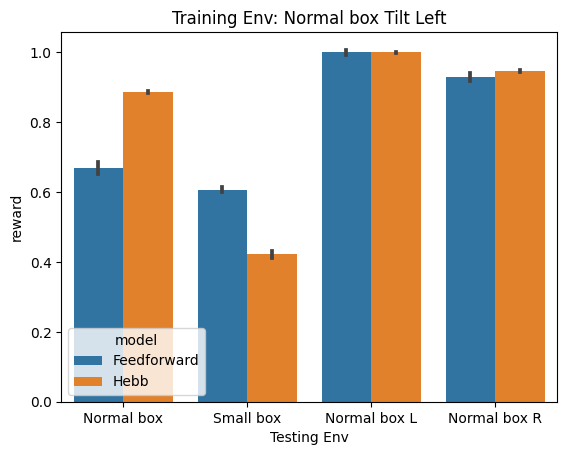

In [180]:
test_data = df.loc[df['train_env'] == 'box_trans_tiltL']
mask = test_data.loc[test_data['test_env'] == 'box_trans_tiltL']
mask = mask.groupby('model').mean()
FF_mean = mask.iloc[0].values[0]
Hebb_mean = mask.iloc[1].values[0]

test_data = test_data.reset_index()

for i in range(test_data.values.shape[0]):
    if test_data.iloc[i]['model'] == 'Feedforward':
        test_data.loc[i, 'reward'] = test_data.iloc[i]['reward']/FF_mean
    elif test_data.iloc[i]['model'] == 'Hebb':
        test_data.loc[i, 'reward'] = test_data.iloc[i]['reward']/Hebb_mean
test_data
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Normal box Tilt Left')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')

/tmp/ipykernel_2897031/2708388961.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mask = mask.groupby('model').mean()


Text(0.5, 0, 'Testing Env')

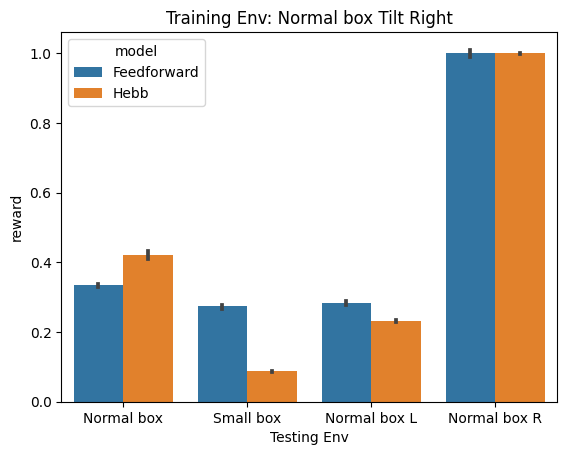

In [181]:
test_data = df.loc[df['train_env'] == 'box_trans_tiltR']
mask = test_data.loc[test_data['test_env'] == 'box_trans_tiltR']
mask = mask.groupby('model').mean()
FF_mean = mask.iloc[0].values[0]
Hebb_mean = mask.iloc[1].values[0]

test_data = test_data.reset_index()

for i in range(test_data.values.shape[0]):
    if test_data.iloc[i]['model'] == 'Feedforward':
        test_data.loc[i, 'reward'] = test_data.iloc[i]['reward']/FF_mean
    elif test_data.iloc[i]['model'] == 'Hebb':
        test_data.loc[i, 'reward'] = test_data.iloc[i]['reward']/Hebb_mean
test_data
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Normal box Tilt Right')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')

In [45]:
# Importing pandas as pd
import pandas as pd
 
# Creating the first Dataframe using dictionary
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward'])

df2 = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward'],
                  data=[[1,2,3,4,5,6]])

pd.concat([df, df2])

,series,robot_num,model,train_env,test_env,reward
0,1,2,3,4,5,6


## New data

In [6]:
model_list = ['FF', 'Hebb']
train_env_list = ['normal', 'small', 'tiltL', 'tiltR']
test_env_list = ['normalbox_trans', 'smallbox_trans', 'box_trans_tiltL', 'box_trans_tiltR']
data_num = 32
count = 1
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward'])

for model in model_list:
    for train_env in train_env_list:
        for test_env in test_env_list:
            temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward'])
            file_name = 'result_csv/rewards_object/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
            read_data = pd.read_csv(file_name)
            temp['reward'] = read_data.values.flatten()
            temp['series'] = count
            temp['robot_num'] = np.arange(1,len(read_data.values)+1)
            temp['model'] = model
            temp['train_env'] = train_env
            temp['test_env'] = test_env
            count += 1
            df = pd.concat([df, temp])
df

# data1 = pd.read_csv('result_csv/rewards_Feedforward_box_trans_tiltL_box_trans_tiltL.csv')

,series,robot_num,model,train_env,test_env,reward
0,1,1,FF,normal,normalbox_trans,215.787888
1,1,2,FF,normal,normalbox_trans,222.228882
2,1,3,FF,normal,normalbox_trans,217.224182
3,1,4,FF,normal,normalbox_trans,221.960876
4,1,5,FF,normal,normalbox_trans,218.133606
...,...,...,...,...,...,...
1018,32,1019,Hebb,tiltR,box_trans_tiltR,356.603546
1019,32,1020,Hebb,tiltR,box_trans_tiltR,364.741425
1020,32,1021,Hebb,tiltR,box_trans_tiltR,357.073029
1021,32,1022,Hebb,tiltR,box_trans_tiltR,360.046875


(0.0, 350.0)

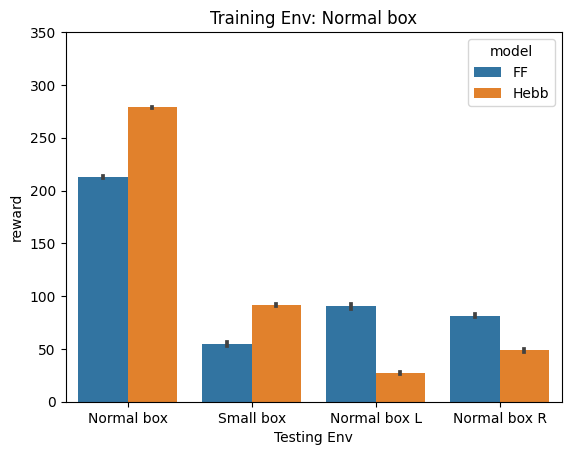

In [15]:
test_data = df.loc[df['train_env'] == 'normal']
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Normal box')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')
plt.ylim([0,350])

(0.0, 350.0)

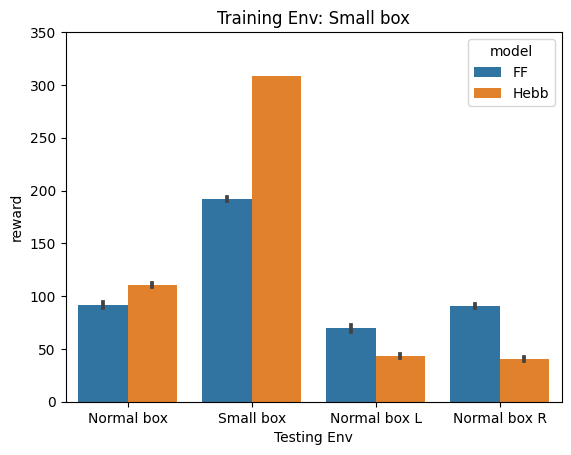

In [11]:
test_data = df.loc[df['train_env'] == 'small']
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Small box')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')
plt.ylim([0,350])

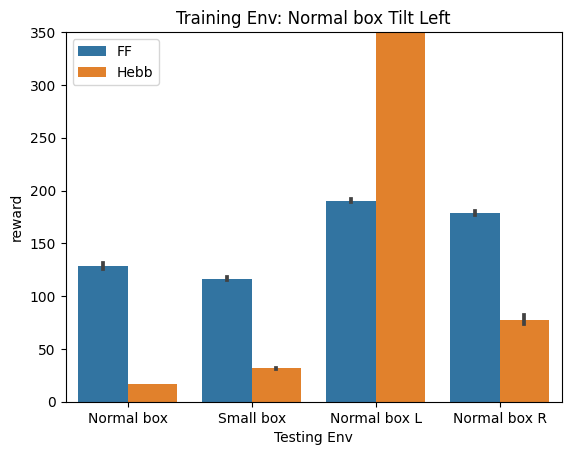

In [12]:
test_data = df.loc[df['train_env'] == 'tiltL']
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Normal box Tilt Left')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')
plt.ylim([0,350])
plt.legend(loc='upper left')

(0.0, 350.0)

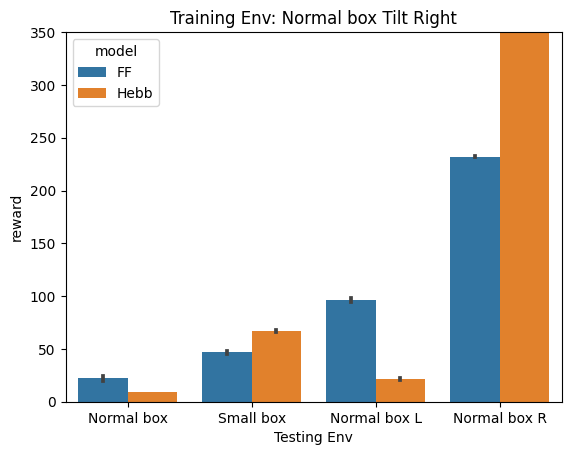

In [13]:
test_data = df.loc[df['train_env'] == 'tiltR']
sns.barplot(x="test_env", y="reward", hue="model", data=test_data)
plt.title('Training Env: Normal box Tilt Right')
plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
plt.xlabel('Testing Env')
plt.ylim([0,350])

### Group data

In [42]:
model_list = ['Feedforward', 'Hebb']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/object_group/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[3]
    reward = name.split('_')[5].split('.')[0]
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,normal,normalbox,124.359161,121
1,1,2,FF,normal,normalbox,127.825462,121
2,1,3,FF,normal,normalbox,119.176285,121
3,1,4,FF,normal,normalbox,129.080719,121
4,1,5,FF,normal,normalbox,121.724747,121
...,...,...,...,...,...,...,...
122,40,123,Hebb,small,smallbox,341.163696,334
123,40,124,Hebb,small,smallbox,342.645966,334
124,40,125,Hebb,small,smallbox,340.857819,334
125,40,126,Hebb,small,smallbox,340.905121,334


In [43]:
df['series']

0       1
1       1
2       1
3       1
4       1
       ..
122    40
123    40
124    40
125    40
126    40
Name: series, Length: 5080, dtype: object

(0.0, 350.0)

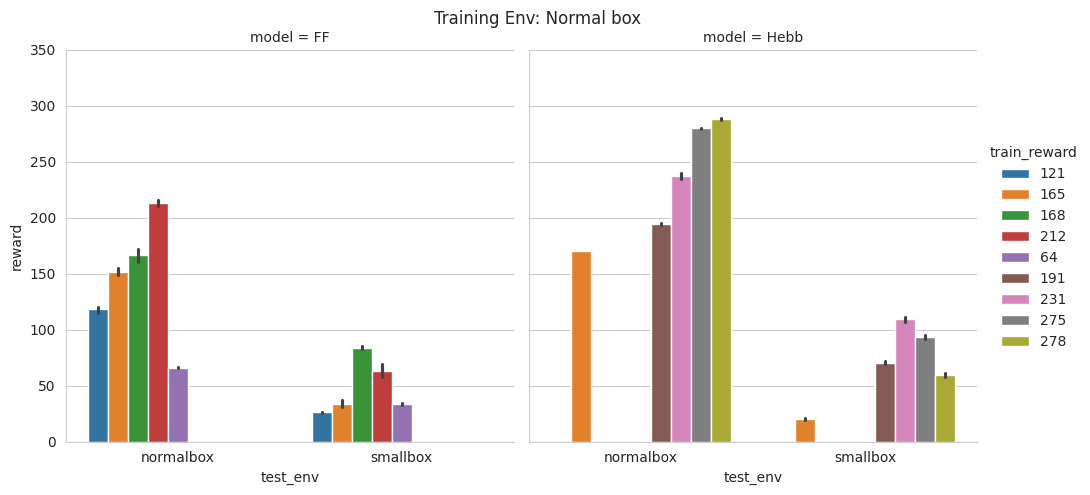

In [44]:
test_data = df.loc[df['train_env'] == 'normal']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


In [45]:
model_list = ['Feedforward', 'Hebb']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/object_group/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[3]
    reward = name.split('_')[5].split('.')[0]
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = model+'_'+train_env+'_'+reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,normal,normalbox,124.359161,FF_normal_121
1,1,2,FF,normal,normalbox,127.825462,FF_normal_121
2,1,3,FF,normal,normalbox,119.176285,FF_normal_121
3,1,4,FF,normal,normalbox,129.080719,FF_normal_121
4,1,5,FF,normal,normalbox,121.724747,FF_normal_121
...,...,...,...,...,...,...,...
122,40,123,Hebb,small,smallbox,341.163696,Hebb_small_334
123,40,124,Hebb,small,smallbox,342.645966,Hebb_small_334
124,40,125,Hebb,small,smallbox,340.857819,Hebb_small_334
125,40,126,Hebb,small,smallbox,340.905121,Hebb_small_334


(0.0, 350.0)

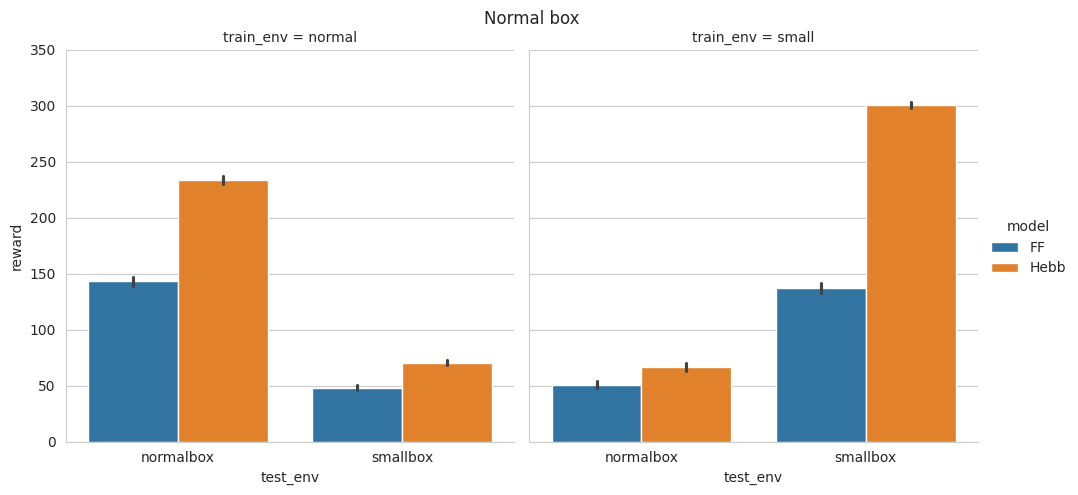

In [49]:
test_data = df
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col='train_env', data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

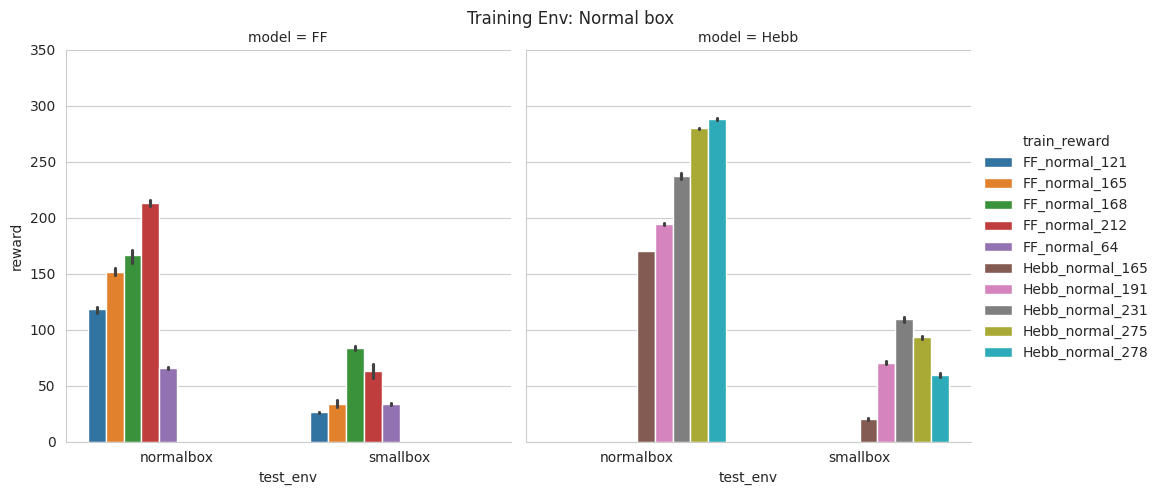

In [46]:
test_data = df.loc[df['train_env'] == 'normal']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

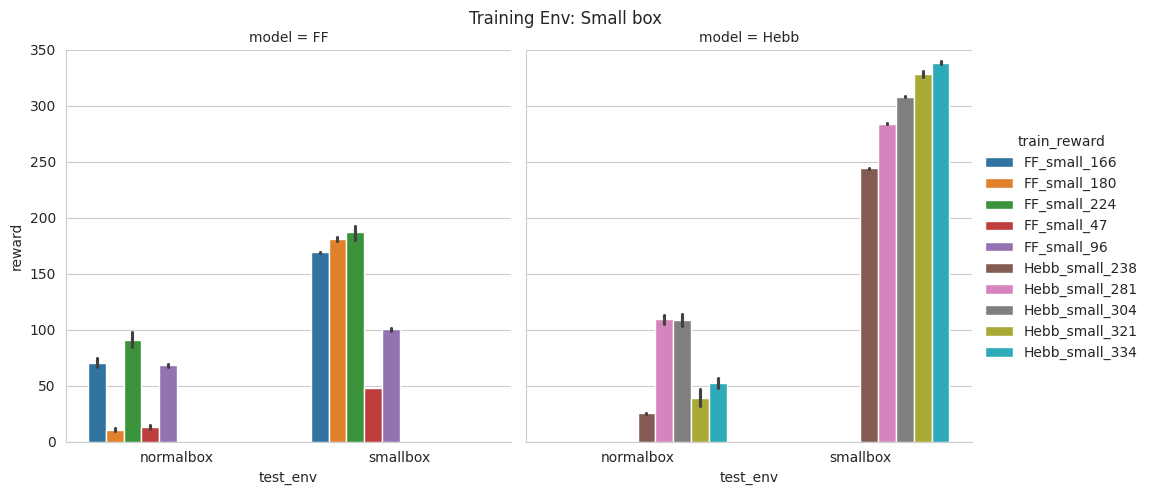

In [47]:
test_data = df.loc[df['train_env'] == 'small']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Small box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


### 0.1 Kg

In [50]:
model_list = ['Feedforward', 'Hebb']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/object_group0.1/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[3]
    reward = name.split('_')[5].split('.')[0]
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = model+'_'+train_env+'_'+reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,normal,normalbox,2.285845,FF_normal_125
1,1,2,FF,normal,normalbox,93.201782,FF_normal_125
2,1,3,FF,normal,normalbox,-6.029134,FF_normal_125
3,1,4,FF,normal,normalbox,14.161236,FF_normal_125
4,1,5,FF,normal,normalbox,29.078650,FF_normal_125
...,...,...,...,...,...,...,...
122,40,123,Hebb,small,smallbox,258.838013,Hebb_small_305
123,40,124,Hebb,small,smallbox,292.787537,Hebb_small_305
124,40,125,Hebb,small,smallbox,309.334747,Hebb_small_305
125,40,126,Hebb,small,smallbox,266.625000,Hebb_small_305


(0.0, 350.0)

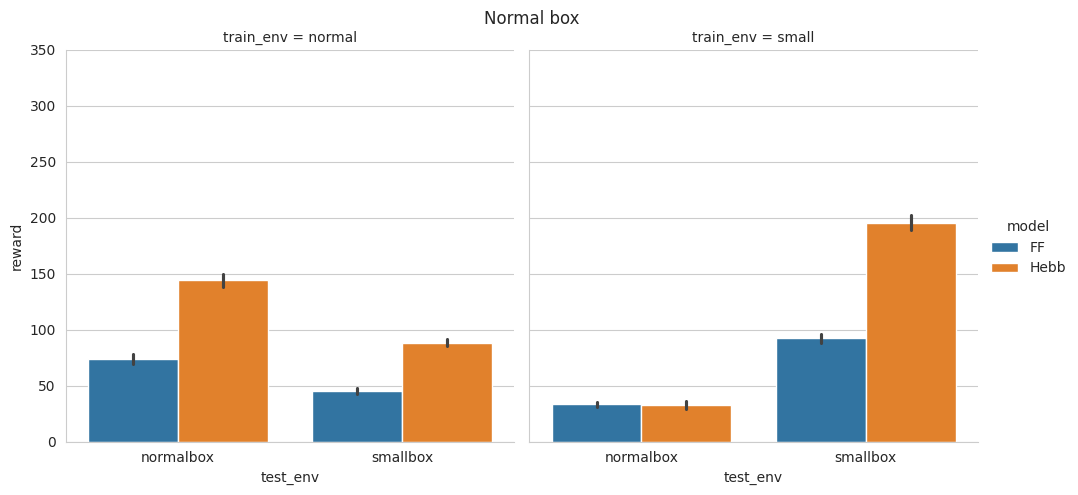

In [51]:
test_data = df
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col='train_env', data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

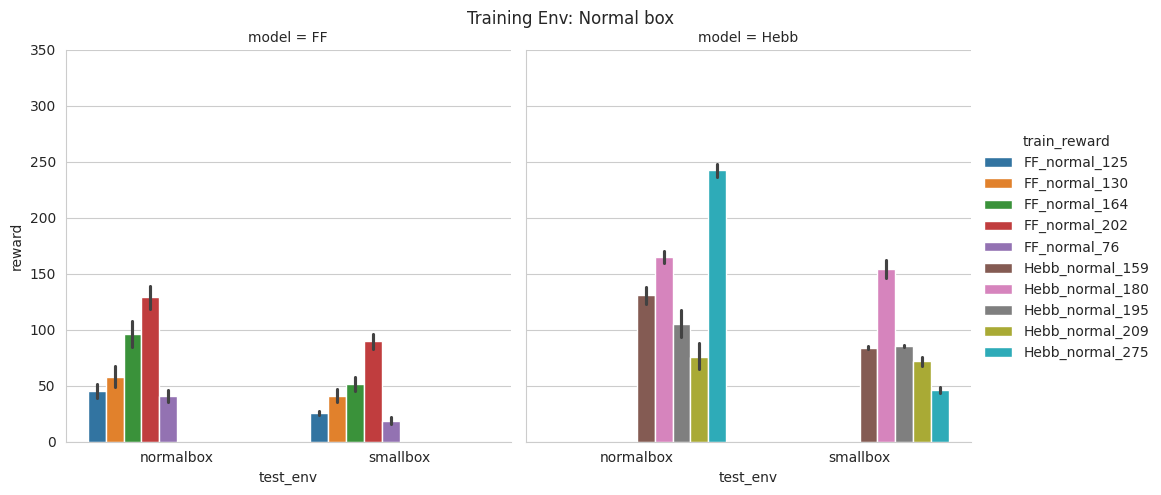

In [37]:
test_data = df.loc[df['train_env'] == 'normal']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

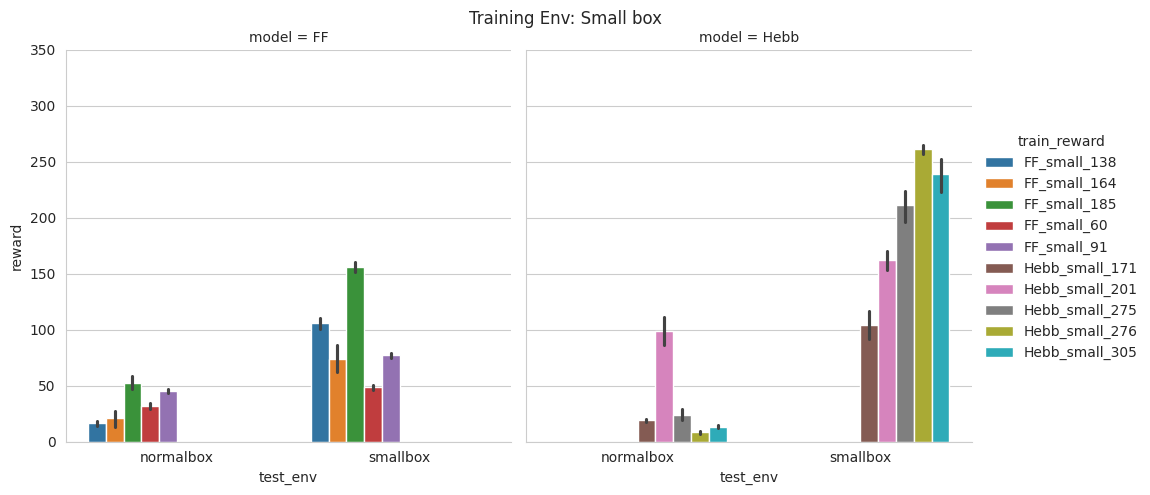

In [38]:
test_data = df.loc[df['train_env'] == 'small']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Small box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


## iniitial random joint pos vel
### Train not rand, Test Rand

In [29]:
model_list = ['Feedforward', 'Hebb']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/joint_initial_random/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[3]
    reward = name.split('_')[5].split('.')[0]
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = model+'_'+train_env+'_'+reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

/tmp/ipykernel_53537/277732561.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])


,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,normal,normalbox,24.090099,FF_normal_121
1,1,2,FF,normal,normalbox,7.890365,FF_normal_121
2,1,3,FF,normal,normalbox,4.744545,FF_normal_121
3,1,4,FF,normal,normalbox,7.511485,FF_normal_121
4,1,5,FF,normal,normalbox,113.050377,FF_normal_121
...,...,...,...,...,...,...,...
122,40,123,Hebb,small,smallbox,324.271149,Hebb_small_334
123,40,124,Hebb,small,smallbox,326.158569,Hebb_small_334
124,40,125,Hebb,small,smallbox,160.612930,Hebb_small_334
125,40,126,Hebb,small,smallbox,286.585907,Hebb_small_334


(0.0, 350.0)

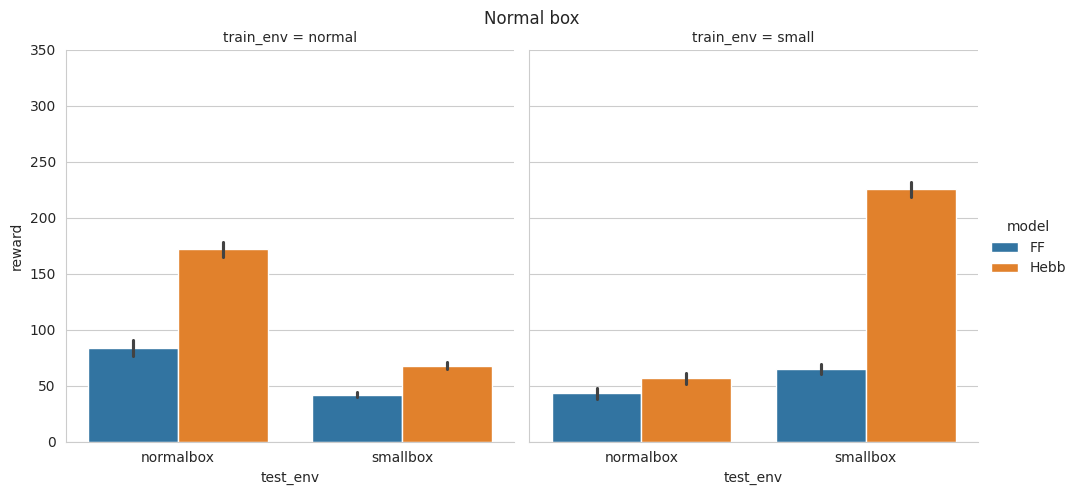

In [30]:
test_data = df
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col='train_env', data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

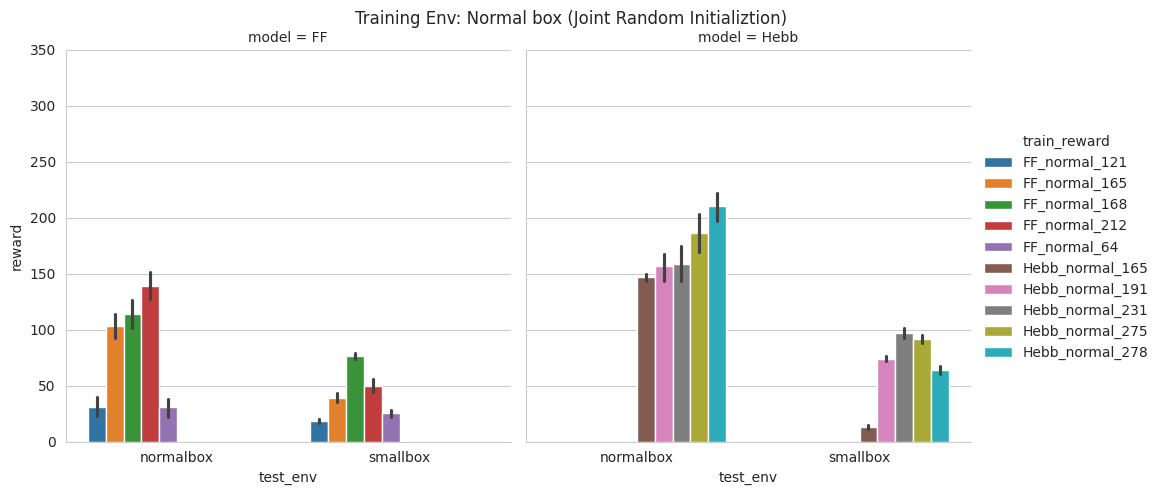

In [13]:
test_data = df.loc[df['train_env'] == 'normal']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Normal box (Joint Random Initializtion)')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

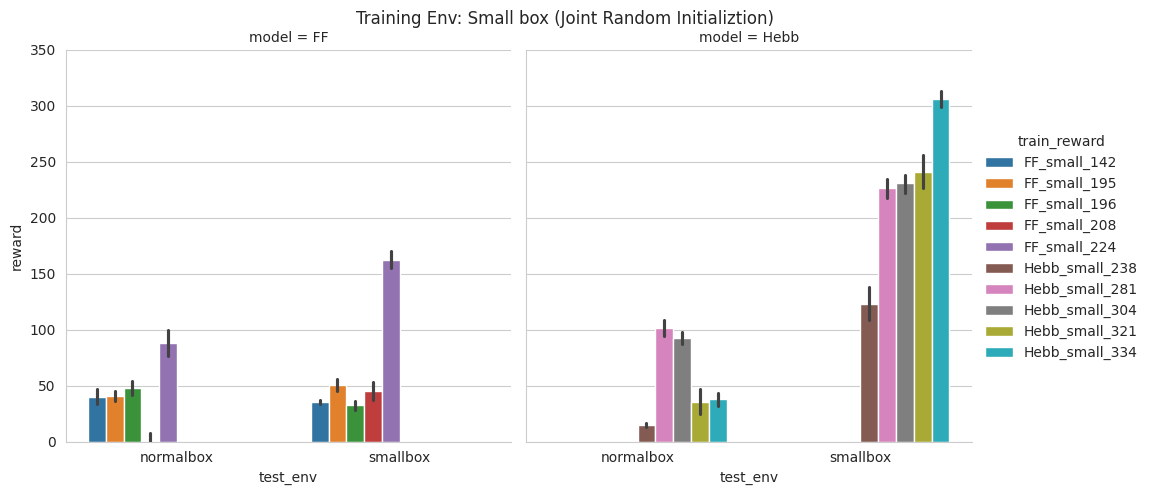

In [14]:
test_data = df.loc[df['train_env'] == 'small']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Small box (Joint Random Initializtion)')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


## Train Randjoint

In [3]:
model_list = ['Feedforward', 'Hebb']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/object_group_randJ/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[3]
    reward = name.split('_')[5].split('.')[0]
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = model+'_'+train_env+'_'+reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,normal,normalbox,119.355515,FF_normal_126
1,1,2,FF,normal,normalbox,119.564774,FF_normal_126
2,1,3,FF,normal,normalbox,130.025681,FF_normal_126
3,1,4,FF,normal,normalbox,125.496979,FF_normal_126
4,1,5,FF,normal,normalbox,122.594826,FF_normal_126
...,...,...,...,...,...,...,...
122,40,123,Hebb,small,smallbox,88.954155,Hebb_small_93
123,40,124,Hebb,small,smallbox,99.381256,Hebb_small_93
124,40,125,Hebb,small,smallbox,96.628242,Hebb_small_93
125,40,126,Hebb,small,smallbox,90.109306,Hebb_small_93


(0.0, 350.0)

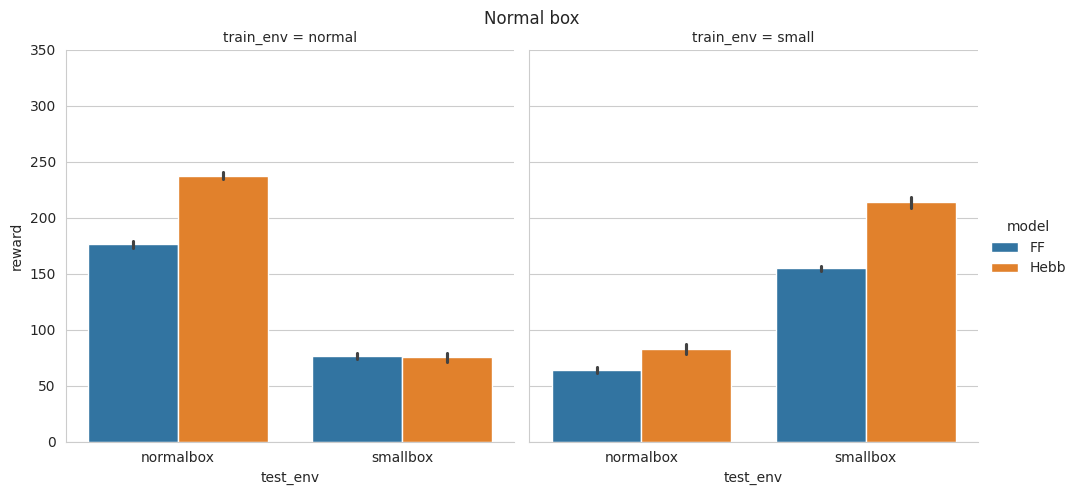

In [4]:
test_data = df
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col='train_env', data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

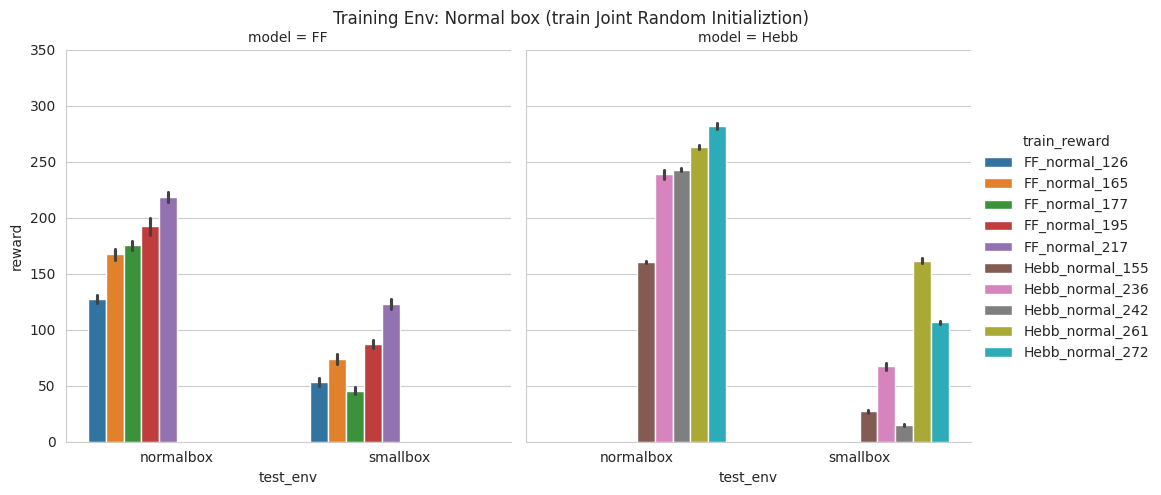

In [6]:
test_data = df.loc[df['train_env'] == 'normal']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Normal box (train Joint Random Initializtion)')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

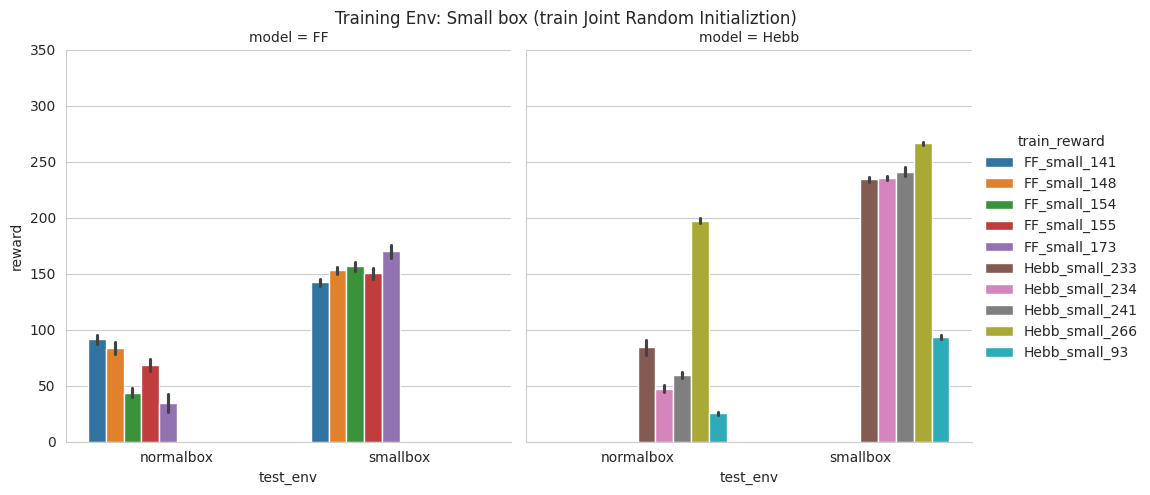

In [7]:
test_data = df.loc[df['train_env'] == 'small']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Small box (train Joint Random Initializtion)')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


### include nobox Env

### no rand

In [15]:
model_list = ['Feedforward', 'Hebb']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/object_group/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    print(name.split('_'))
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[3]
    reward = name.split('_')[5].split('.')[0]
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = model+'_'+train_env+'_'+'_'+reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

['rewards', 'FF', 'normal', 'nobox', 'trans', '121.csv']
['rewards', 'FF', 'normal', 'nobox', 'trans', '165.csv']
['rewards', 'FF', 'normal', 'nobox', 'trans', '168.csv']
['rewards', 'FF', 'normal', 'nobox', 'trans', '212.csv']
['rewards', 'FF', 'normal', 'nobox', 'trans', '64..csv']
['rewards', 'FF', 'normal', 'normalbox', 'trans', '121.csv']
['rewards', 'FF', 'normal', 'normalbox', 'trans', '165.csv']
['rewards', 'FF', 'normal', 'normalbox', 'trans', '168.csv']
['rewards', 'FF', 'normal', 'normalbox', 'trans', '212.csv']
['rewards', 'FF', 'normal', 'normalbox', 'trans', '64..csv']
['rewards', 'FF', 'normal', 'smallbox', 'trans', '121.csv']
['rewards', 'FF', 'normal', 'smallbox', 'trans', '165.csv']
['rewards', 'FF', 'normal', 'smallbox', 'trans', '168.csv']
['rewards', 'FF', 'normal', 'smallbox', 'trans', '212.csv']
['rewards', 'FF', 'normal', 'smallbox', 'trans', '64..csv']
['rewards', 'FF', 'normal', 'tiltLbox', 'trans', '121.csv']
['rewards', 'FF', 'normal', 'tiltLbox', 'trans', '

,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,normal,nobox,27.434893,FF_normal__121
1,1,2,FF,normal,nobox,27.613382,FF_normal__121
2,1,3,FF,normal,nobox,57.828220,FF_normal__121
3,1,4,FF,normal,nobox,26.838678,FF_normal__121
4,1,5,FF,normal,nobox,30.961187,FF_normal__121
...,...,...,...,...,...,...,...
122,200,123,Hebb,tiltR,tiltRbox,358.896118,Hebb_tiltR__358
123,200,124,Hebb,tiltR,tiltRbox,365.418884,Hebb_tiltR__358
124,200,125,Hebb,tiltR,tiltRbox,361.698700,Hebb_tiltR__358
125,200,126,Hebb,tiltR,tiltRbox,355.998352,Hebb_tiltR__358


In [16]:
df['train_reward'].unique()

array(['FF_normal__121', 'FF_normal__165', 'FF_normal__168',
       'FF_normal__212', 'FF_normal__64', 'FF_small__166',
       'FF_small__180', 'FF_small__224', 'FF_small__47', 'FF_small__96',
       'FF_tiltL__109', 'FF_tiltL__147', 'FF_tiltL__164', 'FF_tiltL__202',
       'FF_tiltL__213', 'FF_tiltR__150', 'FF_tiltR__166', 'FF_tiltR__176',
       'FF_tiltR__217', 'FF_tiltR__230', 'Hebb_normal__165',
       'Hebb_normal__191', 'Hebb_normal__231', 'Hebb_normal__275',
       'Hebb_normal__278', 'Hebb_small__238', 'Hebb_small__281',
       'Hebb_small__304', 'Hebb_small__321', 'Hebb_small__334',
       'Hebb_tiltL__168', 'Hebb_tiltL__318', 'Hebb_tiltL__331',
       'Hebb_tiltL__367', 'Hebb_tiltL__90', 'Hebb_tiltR__170',
       'Hebb_tiltR__270', 'Hebb_tiltR__281', 'Hebb_tiltR__282',
       'Hebb_tiltR__358'], dtype=object)

(0.0, 350.0)

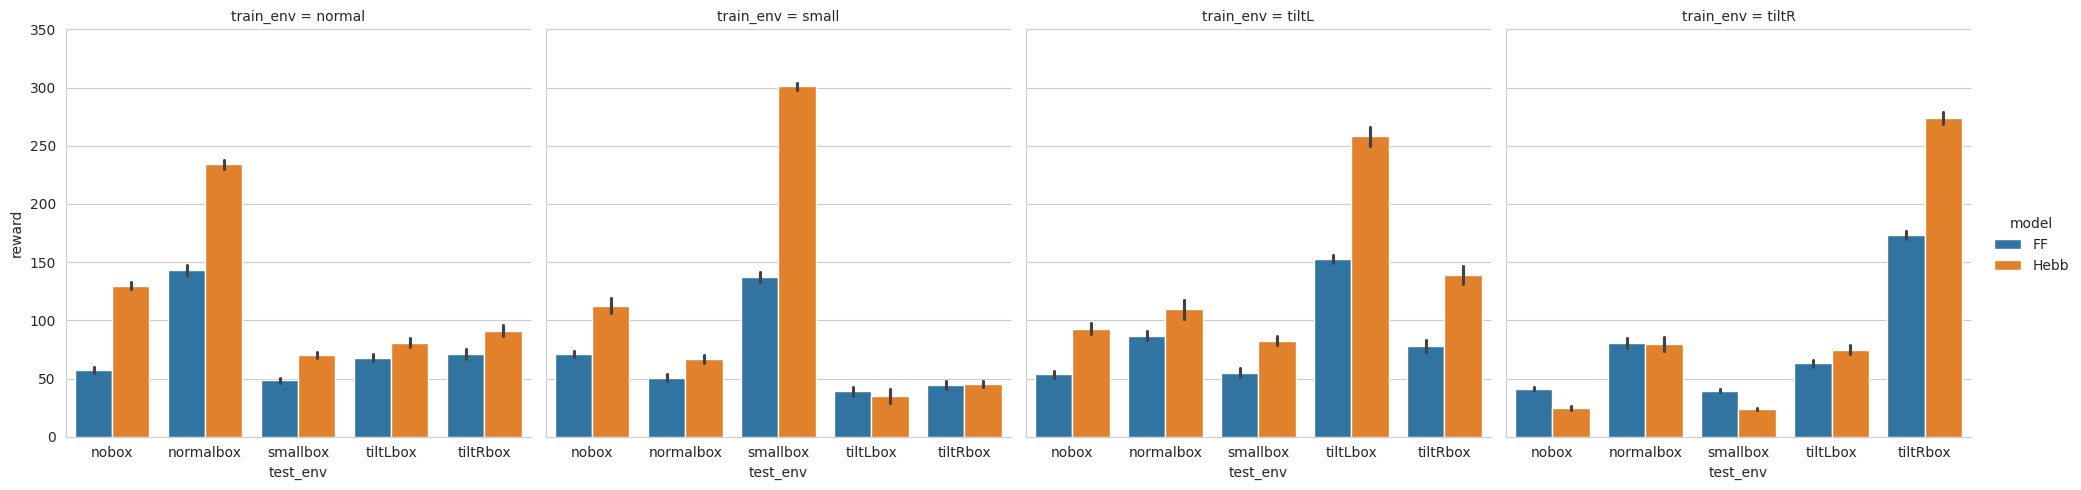

In [17]:
test_data = df
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col='train_env', data=test_data)
# plt.subplots_adjust(top=0.9)
# plt.suptitle('Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=45)
plt.ylim([0,350])


(0.0, 350.0)

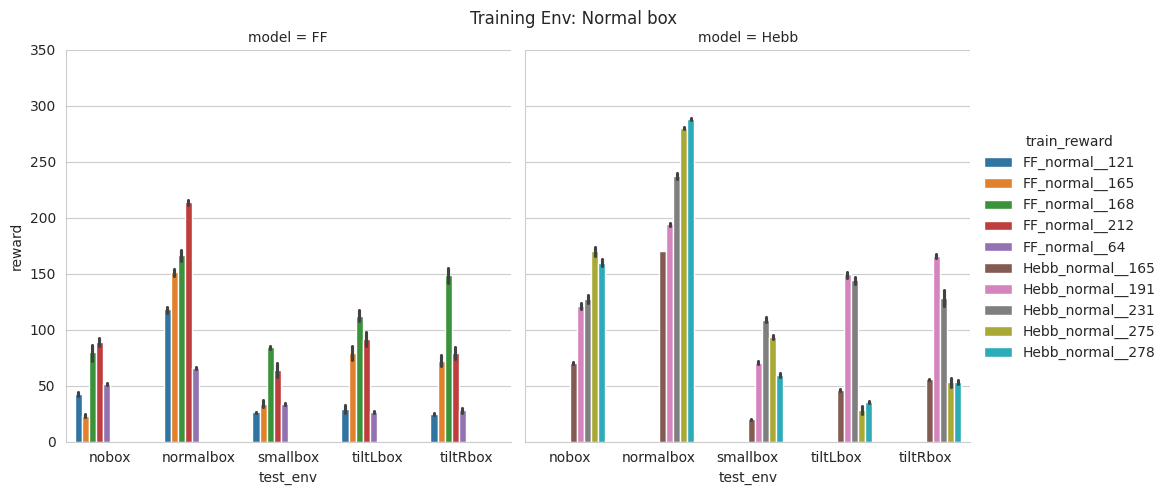

In [18]:
test_data = df.loc[df['train_env'] == 'normal']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

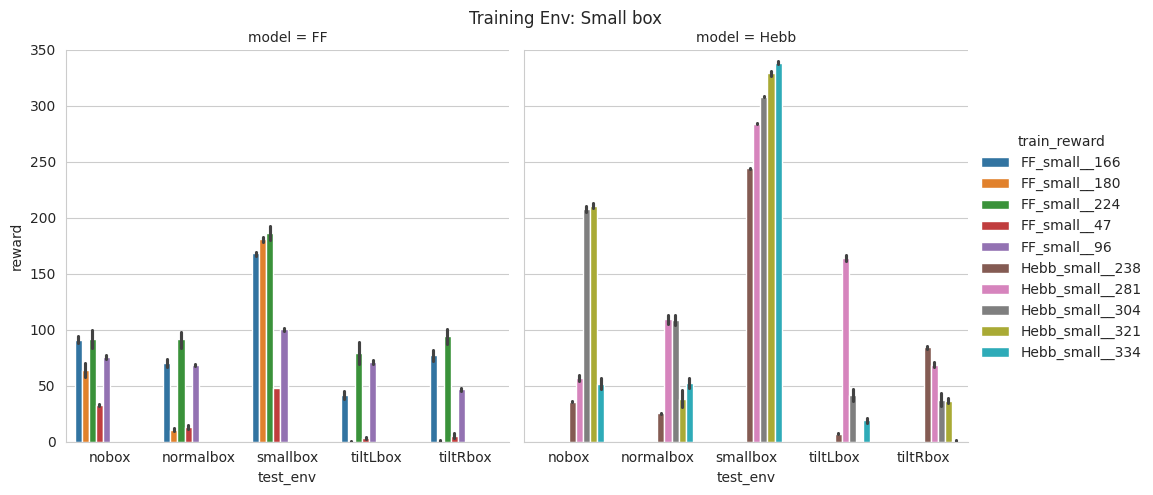

In [19]:
test_data = df.loc[df['train_env'] == 'small']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Small box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

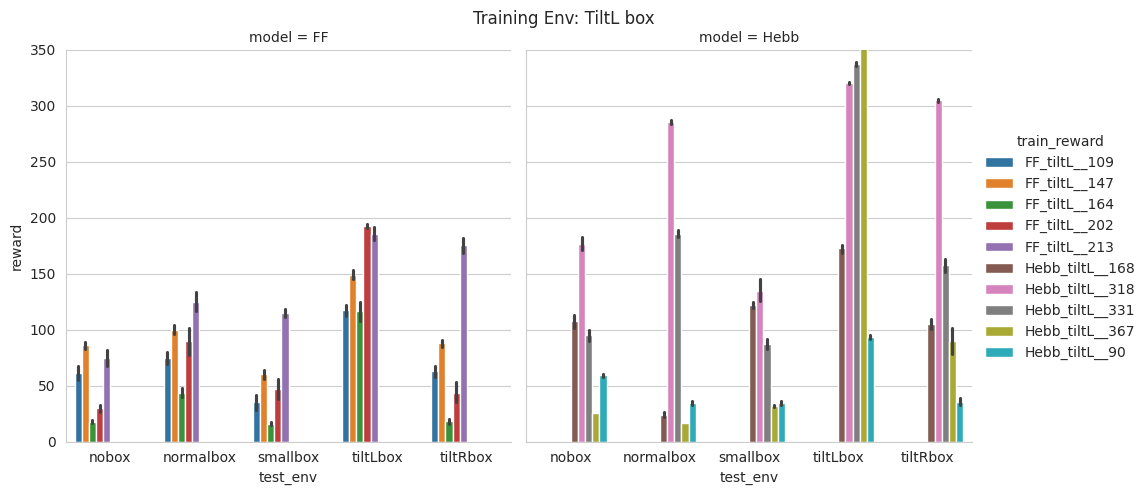

In [20]:
test_data = df.loc[df['train_env'] == 'tiltL']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: TiltL box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=45)
plt.ylim([0,350])


(0.0, 350.0)

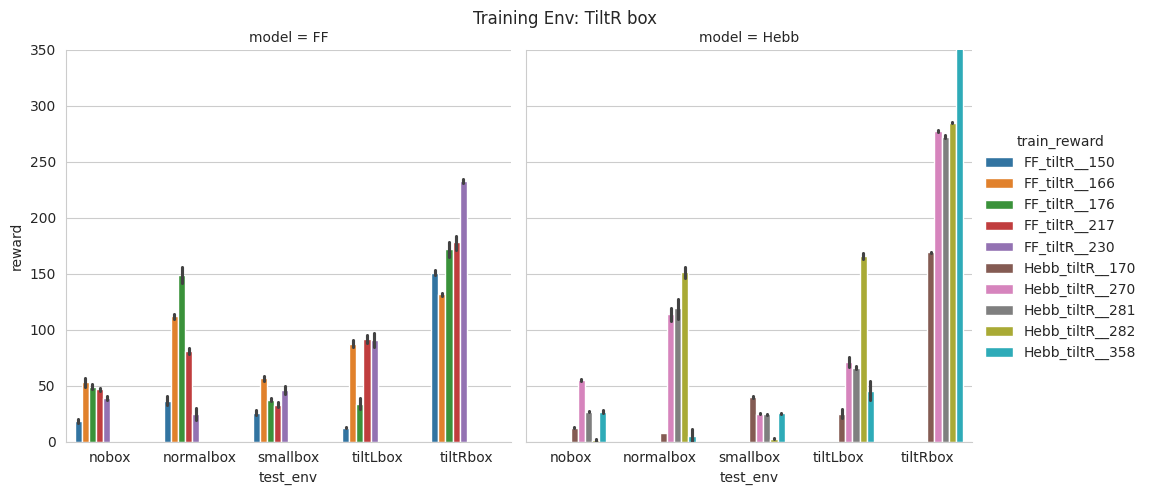

In [21]:
test_data = df.loc[df['train_env'] == 'tiltR']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: TiltR box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=45)
plt.ylim([0,350])


rand

In [8]:
model_list = ['Feedforward', 'Hebb']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/object_group_randJ/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[3]
    reward = name.split('_')[5].split('.')[0]
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = model+'_'+train_env+'_'+reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,normal,nobox,50.304176,FF_normal_126
1,1,2,FF,normal,nobox,54.528599,FF_normal_126
2,1,3,FF,normal,nobox,30.732162,FF_normal_126
3,1,4,FF,normal,nobox,58.768772,FF_normal_126
4,1,5,FF,normal,nobox,56.792847,FF_normal_126
...,...,...,...,...,...,...,...
122,60,123,Hebb,small,smallbox,88.954155,Hebb_small_93
123,60,124,Hebb,small,smallbox,99.381256,Hebb_small_93
124,60,125,Hebb,small,smallbox,96.628242,Hebb_small_93
125,60,126,Hebb,small,smallbox,90.109306,Hebb_small_93


(0.0, 350.0)

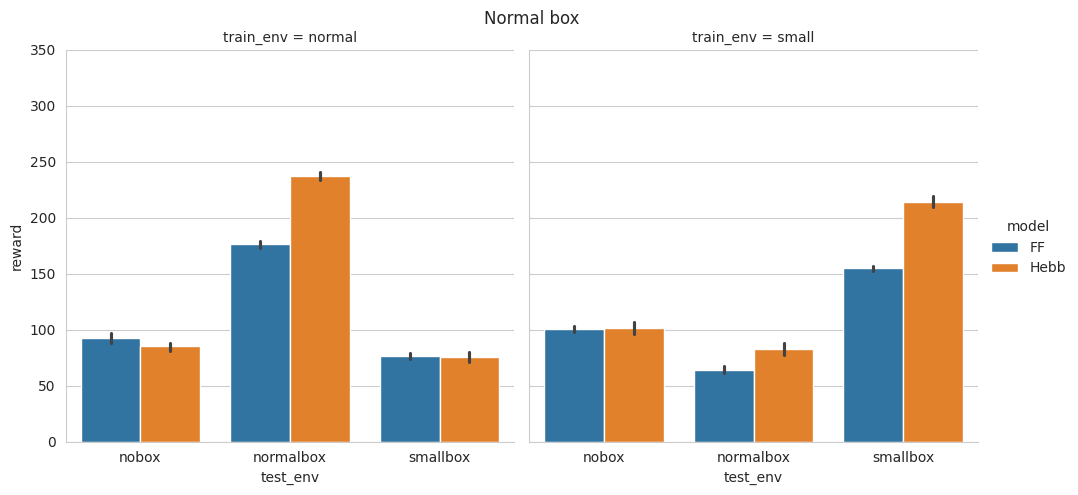

In [9]:
test_data = df
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col='train_env', data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

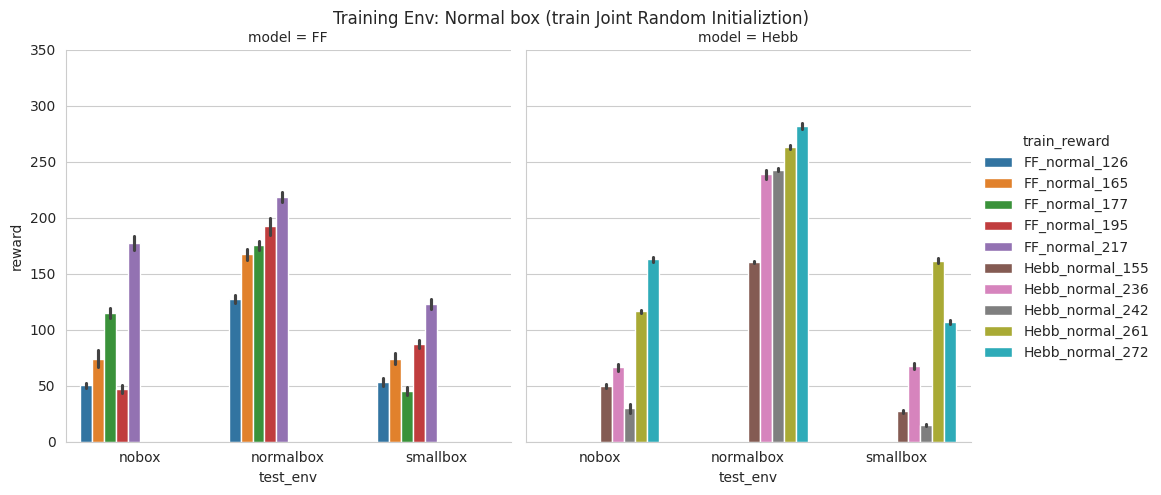

In [10]:
test_data = df.loc[df['train_env'] == 'normal']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Normal box (train Joint Random Initializtion)')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

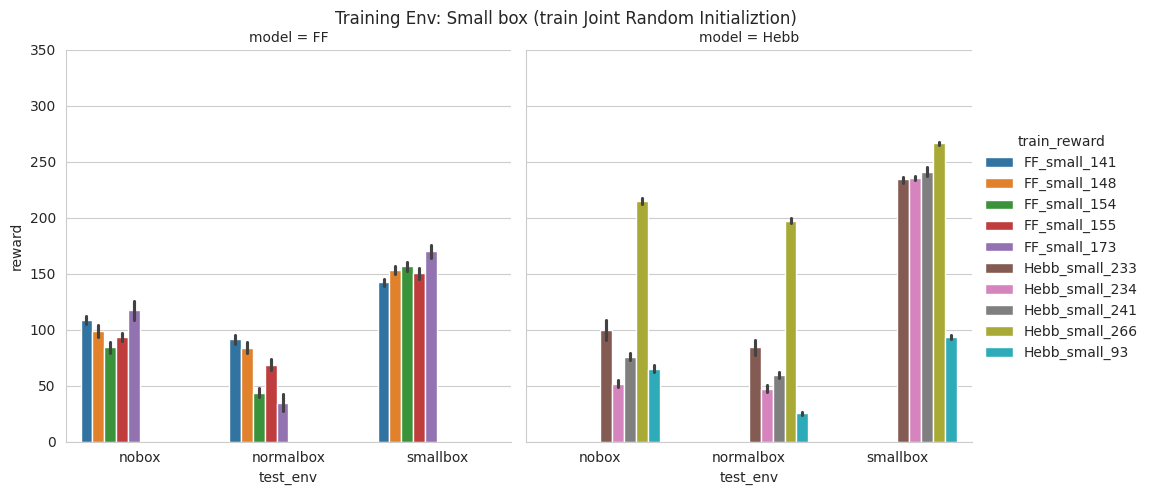

In [11]:
test_data = df.loc[df['train_env'] == 'small']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Small box (train Joint Random Initializtion)')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


### New Env Randomize ball height

In [31]:
model_list = ['Feedforward', 'Hebb', 'lstm']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/rd/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    print(name.split('_'))
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[4]
    reward = name.split('_')[6].split('.')[0]
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = model+'_'+train_env+'_'+'_'+reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

['rewards', 'FF', 'smallballRD', 'trans', 'bigballRD', 'trans', '123.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'bigballRD', 'trans', '130.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'bigballRD', 'trans', '141.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'nobox', 'trans', '123.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'nobox', 'trans', '130.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'nobox', 'trans', '141.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'normalbox', 'trans', '123.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'normalbox', 'trans', '130.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'normalbox', 'trans', '141.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'smallballRD', 'trans', '123.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'smallballRD', 'trans', '130.csv']
['rewards', 'FF', 'smallballRD', 'trans', 'smallballRD', 'trans', '141.csv']
['rewards', 'Hebb', 'smallballRD', 'trans', 'bigballRD', 'trans', '152.csv']
['rewards', 'Hebb', 'smallbal

/tmp/ipykernel_53537/1491358188.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, temp])


,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,smallballRD,bigballRD,81.680077,FF_smallballRD__123
1,1,2,FF,smallballRD,bigballRD,71.035629,FF_smallballRD__123
2,1,3,FF,smallballRD,bigballRD,81.999901,FF_smallballRD__123
3,1,4,FF,smallballRD,bigballRD,32.909016,FF_smallballRD__123
4,1,5,FF,smallballRD,bigballRD,65.687691,FF_smallballRD__123
...,...,...,...,...,...,...,...
1018,36,1019,seqlstm,smallballRD,smallballRD,133.779144,seqlstm_smallballRD__129
1019,36,1020,seqlstm,smallballRD,smallballRD,157.827057,seqlstm_smallballRD__129
1020,36,1021,seqlstm,smallballRD,smallballRD,141.052109,seqlstm_smallballRD__129
1021,36,1022,seqlstm,smallballRD,smallballRD,104.246948,seqlstm_smallballRD__129


In [32]:
df['train_reward'].unique()

array(['FF_smallballRD__123', 'FF_smallballRD__130',
       'FF_smallballRD__141', 'Hebb_smallballRD__152',
       'Hebb_smallballRD__160', 'Hebb_smallballRD__204',
       'seqlstm_smallballRD__111', 'seqlstm_smallballRD__116',
       'seqlstm_smallballRD__129'], dtype=object)

Text(43.76643055555556, 0.5, 'Reward')

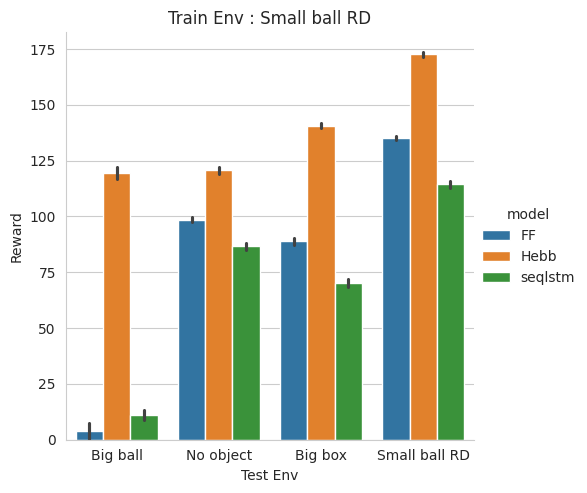

In [39]:
test_data = df
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col='train_env', data=test_data, )
# plt.subplots_adjust(top=0.9)
plt.title('Train Env : Small ball RD')
plt.xticks([0,1,2,3], ['Big ball', 'No object', 'Big box', 'Small ball RD'])
plt.xlabel('Test Env')
plt.ylabel('Reward')

# plt.legend(['1', '2', '3'])
# plt.xticks(rotation=45)
# plt.ylim([0,350])


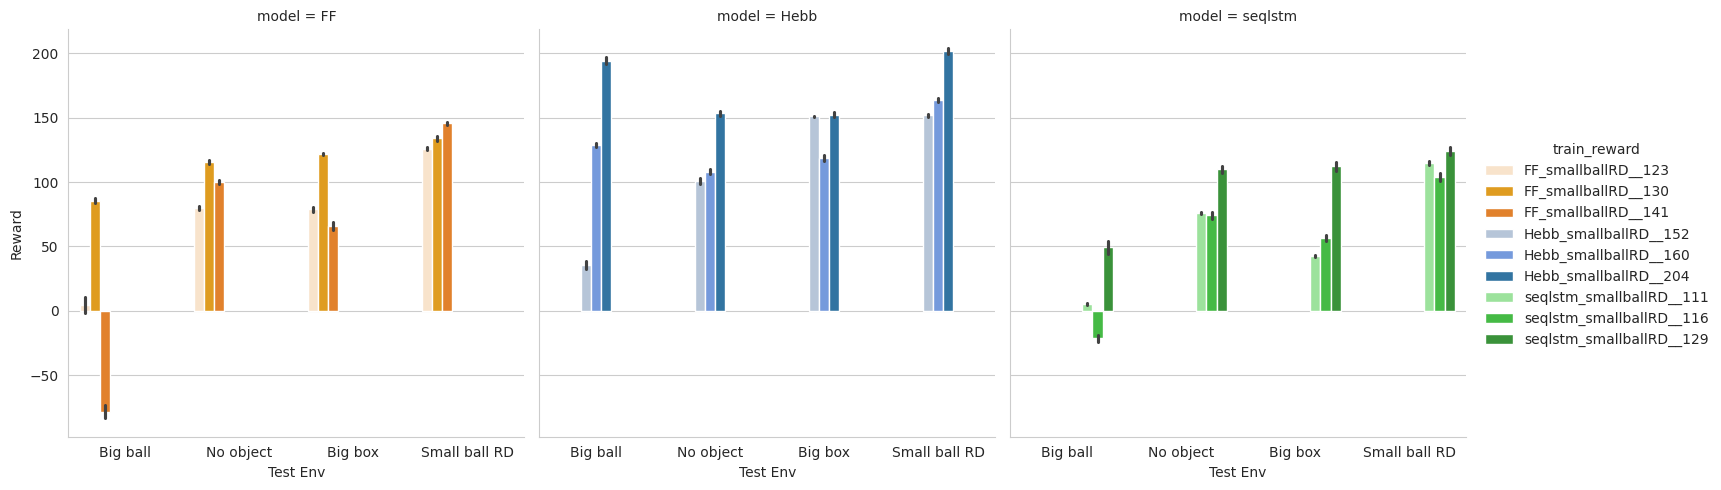

In [34]:
test_data = df
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col='model', data=test_data,
            palette = ['bisque', 'orange', "tab:orange",  
                        'lightsteelblue', 'cornflowerblue', "tab:blue",
                        'lightgreen', 'limegreen', 'tab:green'])
# plt.subplots_adjust(top=0.9)
# plt.suptitle('Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=45)
# plt.ylim([0,350])
# plt.title('Train Env : Small ball RD')
plt.xticks([0,1,2,3], ['Big ball', 'No object', 'Big box', 'Small ball RD'])
plt.xlabel('Test Env')
# plt.ylabel('Reward')
g.set_xlabels('Test Env')
g.set_ylabels('Reward')

Text(43.76643055555556, 0.5, 'Reward')

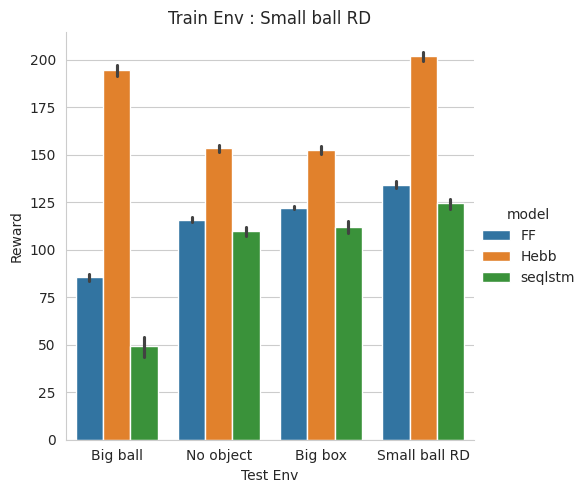

In [37]:
test_data = df.loc[(df['train_reward'] == 'FF_smallballRD__130') | 
                   (df['train_reward'] == 'Hebb_smallballRD__204') | 
                   (df['train_reward'] == 'seqlstm_smallballRD__129')]
test_data
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col='train_env', data=test_data)
# plt.subplots_adjust(top=0.9)
plt.title('Train Env : Small ball RD')
plt.xticks([0,1,2,3], ['Big ball', 'No object', 'Big box', 'Small ball RD'])
plt.xlabel('Test Env')
plt.ylabel('Reward')
# plt.xticks(rotation=45)
# plt.ylim([0,350])

(0.0, 350.0)

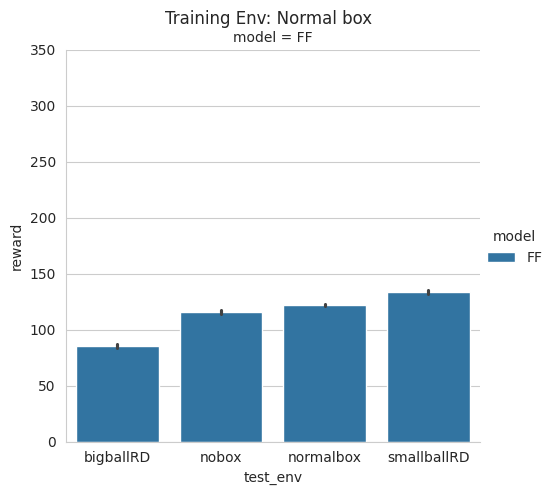

In [36]:
# test_data = df.loc[df['train_env'] == 'normal']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


In [22]:
# test_data = df.loc[df['train_env'] == 'small']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar')
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Small box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
# plt.ylim([0,350])


ValueError: Could not interpret value `test_env` for `x`. Value is a string, but `data` was not passed.

rand

In [ ]:
model_list = ['Feedforward', 'Hebb']
env_list = ['normalbox_trans', 'smallbox_trans']#, 'box_trans_tiltL', 'box_trans_tiltR']
df = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
count = 1

dir_path = 'rewards/object_group_randJ/'
file_list = sorted(listdir(dir_path))
# print(sorted(file_list))
for name in file_list:
    # rew_index = name.rfind('_')
    # reward_name = name[rew_index+1:rew_index+4]
    model = name.split('_')[1]
    train_env = name.split('_')[2]
    test_env = name.split('_')[3]
    reward = name.split('_')[5].split('.')[0]
    # print(reward)
    temp = pd.DataFrame(columns=['series', 'robot_num', 'model', 'train_env', 'test_env', 'reward', 'train_reward'])
    # file_name = 'rewards/object_group/rewards_'+model+'_'+train_env+'_'+test_env+'.csv'
    read_data = pd.read_csv(dir_path+name)
    temp['reward'] = read_data.values.flatten()
    temp['series'] = count
    temp['robot_num'] = np.arange(1,len(read_data.values)+1)
    temp['model'] = model
    temp['train_env'] = train_env
    temp['test_env'] = test_env
    temp['train_reward'] = model+'_'+train_env+'_'+reward
    # print(temp)
    count += 1
    df = pd.concat([df, temp])
df

,series,robot_num,model,train_env,test_env,reward,train_reward
0,1,1,FF,normal,nobox,50.304176,FF_normal_126
1,1,2,FF,normal,nobox,54.528599,FF_normal_126
2,1,3,FF,normal,nobox,30.732162,FF_normal_126
3,1,4,FF,normal,nobox,58.768772,FF_normal_126
4,1,5,FF,normal,nobox,56.792847,FF_normal_126
...,...,...,...,...,...,...,...
122,60,123,Hebb,small,smallbox,88.954155,Hebb_small_93
123,60,124,Hebb,small,smallbox,99.381256,Hebb_small_93
124,60,125,Hebb,small,smallbox,96.628242,Hebb_small_93
125,60,126,Hebb,small,smallbox,90.109306,Hebb_small_93


(0.0, 350.0)

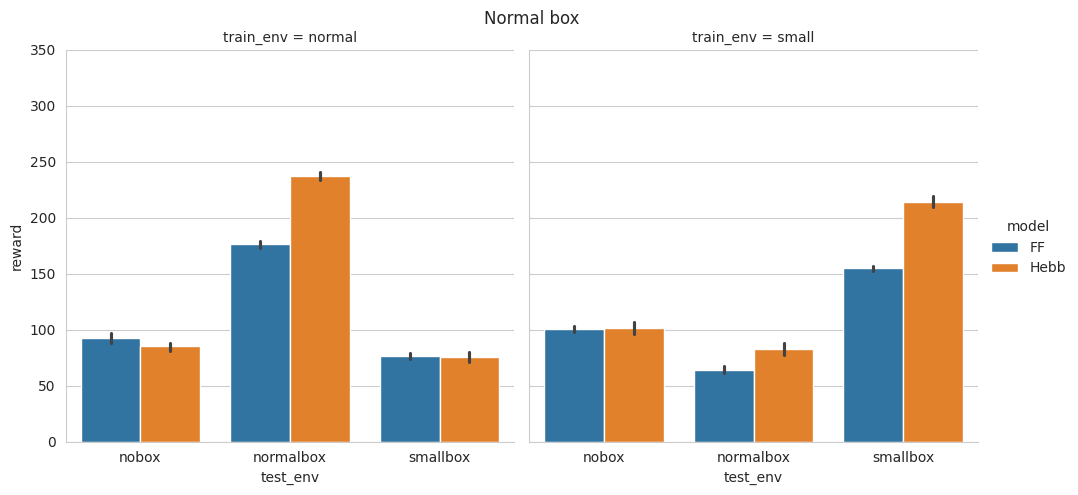

In [ ]:
test_data = df
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="model", 
            kind='bar', col='train_env', data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Normal box')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

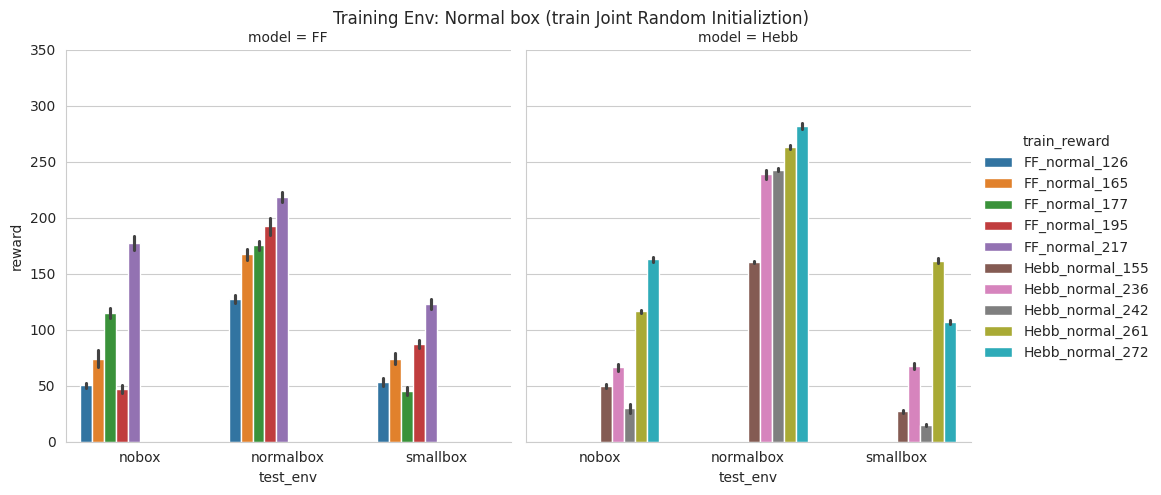

In [ ]:
test_data = df.loc[df['train_env'] == 'normal']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Normal box (train Joint Random Initializtion)')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])


(0.0, 350.0)

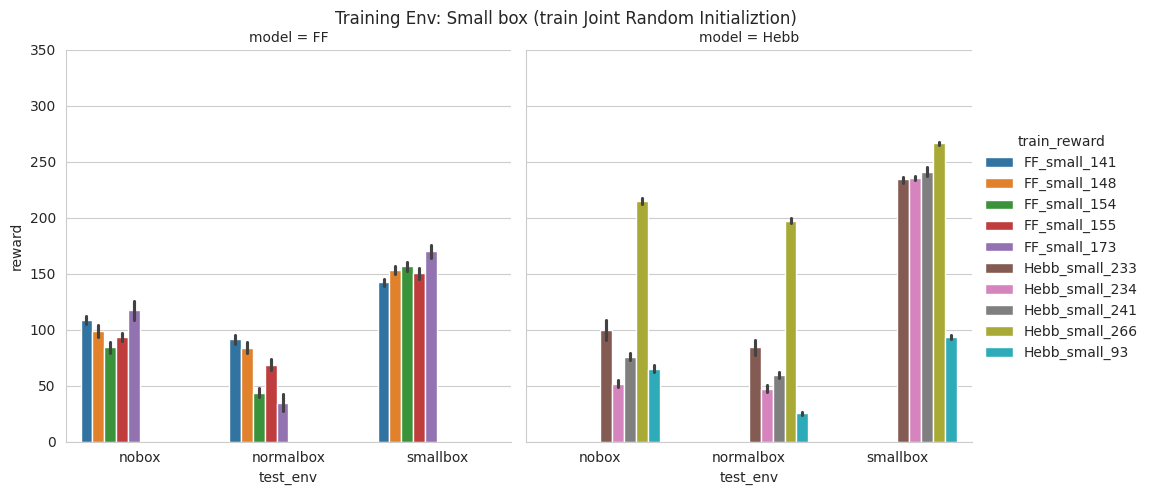

In [ ]:
test_data = df.loc[df['train_env'] == 'small']
# sns.set(style="ticks")
sns.set_style("whitegrid")
g = sns.catplot(x="test_env", y="reward", hue="train_reward", 
            kind='bar', col="model", data=test_data)
plt.subplots_adjust(top=0.9)
plt.suptitle('Training Env: Small box (train Joint Random Initializtion)')
# plt.xticks([0,1,2,3], ['Normal box', 'Small box', 'Normal box L', 'Normal box R'])
# plt.xlabel('Testing Env')
# plt.xticks(rotation=90)
plt.ylim([0,350])
